In [0]:
from keras.datasets import imdb
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
import numpy as np
from keras import regularizers
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
#STD
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#L2:
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#DPT:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# Tworzenie zbioru walidacyjnego:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 184us/sample - loss: 0.5049 - acc: 0.7901 - val_loss: 0.4092 - val_acc: 0.8353
Epoch 2/20
15000/15000 [==============================] - 3s 173us/sample - loss: 0.2938 - acc: 0.9030 - val_loss: 0.2998 - val_acc: 0.8868
Epoch 3/20
15000/15000 [==============================] - 3s 175us/sample - loss: 0.2150 - acc: 0.9305 - val_loss: 0.3192 - val_acc: 0.8686
Epoch 4/20
15000/15000 [==============================] - 3s 175us/sample - loss: 0.1713 - acc: 0.9445 - val_loss: 0.2830 - val_acc: 0.8888
Epoch 5/20
15000/15000 [==============================] - 3s 175us/sample - loss: 0.1402 - acc: 0.9552 - val_loss: 0.2916 - val_acc: 0.8876
Epoch 6/20
15000/15000 [==============================] - 3s 175us/sample - loss: 0.1125 - acc: 0.9665 - val_loss: 0.2980 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 3s 176us/sample - loss: 0.0972 - acc: 0.9696 - val_l

In [0]:

history_l2 = l2_model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512, validation_data=(x_val, y_val))
history_dpt = dpt_model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 187us/sample - loss: 0.5617 - acc: 0.7897 - val_loss: 0.4519 - val_acc: 0.8513
Epoch 2/20
15000/15000 [==============================] - 3s 176us/sample - loss: 0.3655 - acc: 0.8974 - val_loss: 0.3650 - val_acc: 0.8806
Epoch 3/20
15000/15000 [==============================] - 3s 173us/sample - loss: 0.2960 - acc: 0.9188 - val_loss: 0.3348 - val_acc: 0.8889
Epoch 4/20
15000/15000 [==============================] - 3s 170us/sample - loss: 0.2571 - acc: 0.9325 - val_loss: 0.3457 - val_acc: 0.8827
Epoch 5/20
15000/15000 [==============================] - 3s 168us/sample - loss: 0.2338 - acc: 0.9407 - val_loss: 0.3309 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 3s 167us/sample - loss: 0.2194 - acc: 0.9452 - val_loss: 0.3568 - val_acc: 0.8815
Epoch 7/20
15000/15000 [==============================] - 2s 166us/sample - loss: 0.2068 - acc: 0.9509 - val_l

In [0]:
history_dict = history.history

In [0]:



history_dict_l2 = history_l2.history


history_dict_dpt = history_dpt.history


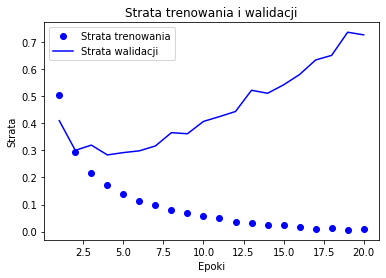

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

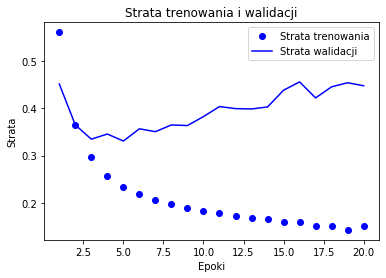

In [0]:
acc_l2 = history_l2.history['acc']
val_acc_l2 = history_l2.history['val_acc']
loss_l2 = history_l2.history['loss']
val_loss_l2 = history_l2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_l2, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss_l2, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

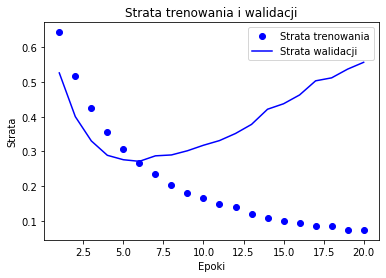

In [0]:
acc_dpt = history_dpt.history['acc']
val_acc_dpt = history_dpt.history['val_acc']
loss_dpt = history_dpt.history['loss']
val_loss_dpt = history_dpt.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_dpt, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss_dpt, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

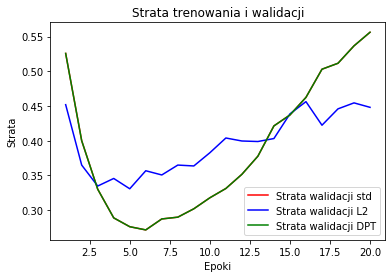

In [0]:

plt.plot(epochs, val_loss, 'r', label='Strata walidacji std')
plt.plot(epochs, val_loss_l2, 'b', label='Strata walidacji L2')
plt.plot(epochs, val_loss_dpt, 'g', label='Strata walidacji DPT')

plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

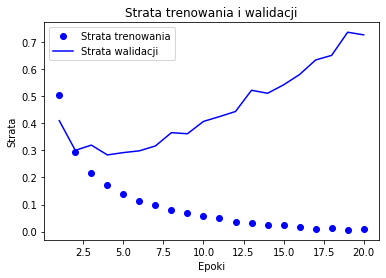

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

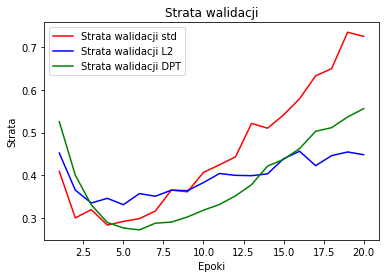

In [0]:
plt.plot(epochs, val_loss, 'r', label='Strata walidacji std')
plt.plot(epochs, val_loss_l2, 'b', label='Strata walidacji L2')
plt.plot(epochs, val_loss_dpt, 'g', label='Strata walidacji DPT')

plt.title('Strata walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()